<a href="https://colab.research.google.com/github/KD-kAnEsHi/Mini-Projects/blob/main/PyTorch_Workflow_Chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.6.0+cu124'

In [3]:
# Generates data, we will make use of to run a regression and gradient model

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze(1)
y = weight * x + bias
x[:10], y[:10]

# x: features
# y: w-weights, x-features, b-bias

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
# splitting the data into testing and training set

train_split = int(0.8 * len(x)) # gets how much val of the list makes up 80% of it
x_traing, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]
len(x_test), len(y_test), len(x_traing), len(y_train)

(10, 10, 40, 40)

In [5]:
# making use of matplotlin to visualize data
def plot_predictions(train_data=x_traing,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):

  """
    Plotsl training data, test data and compares predictions
  """
  plt.figure(figsize=(10, 7))

  # plot test and traning data
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

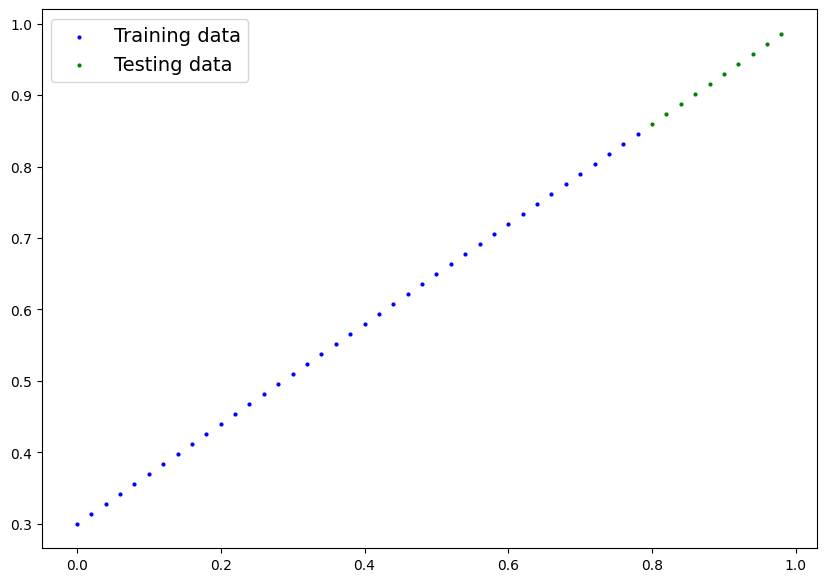

In [6]:
plot_predictions()

IMPLEMENTATION:

In [7]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1, # randoms weight
                                            requires_grad=True, # we need the gradient for training
                                            dtype=torch.float)) #  sets the fl to float32

    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

torch.nn: contains building block of computation graphs

torch.nn.pramater: stores the tensore which may be used wiht nn.module

torch.nn.module: base class for all NN modules, need forward()

torch.opetim: contains a variety of optimization algorithm, helps with computatin

requires_grad = True -
   > Means PyTorch will track the gradient of this specific parameter for use wiht torch.autograd and gradient descent

In [15]:
# set a manual seed of 42, since nn.Parameter are randomly initialized
torch.manual_seed(20)

# creates an instance of the model
model_0 = LinearRegressionModel()

# shows the parameters within the nn.Modules
list(model_0.parameters())
#list(model_0.bias), list(model_0.weights)

[Parameter containing:
 tensor([-1.2061], requires_grad=True),
 Parameter containing:
 tensor([0.0617], requires_grad=True)]

In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([-1.2061])), ('bias', tensor([0.0617]))])

In [17]:
with torch.inference_mode():
  y_preds = model_0(x_test)

In [19]:
# Check the predictions
print(f"Number of testing samples: {len(x_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[-0.9032],
        [-0.9273],
        [-0.9514],
        [-0.9756],
        [-0.9997],
        [-1.0238],
        [-1.0479],
        [-1.0720],
        [-1.0962],
        [-1.1203]])


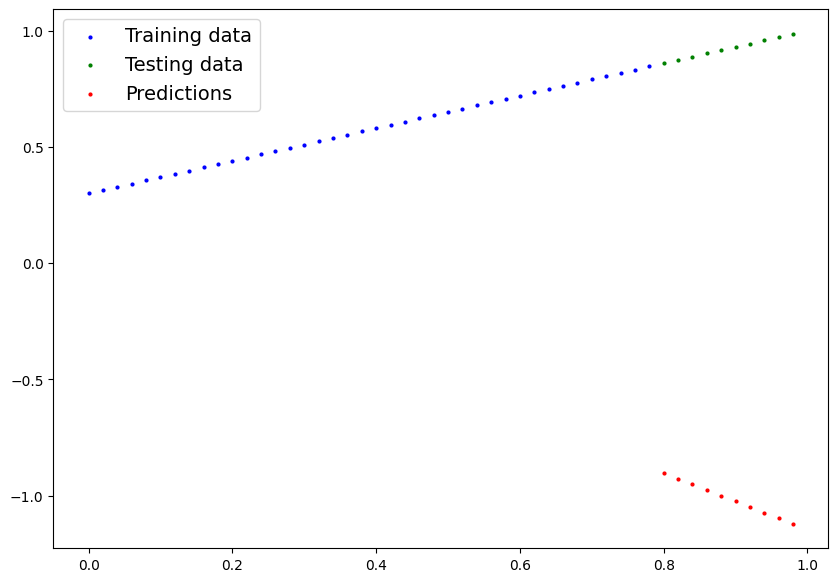

In [20]:
plot_predictions(predictions=y_preds)

Loss functions: Measure how close/wrong the models predictions are froim the truth labels


Optimizer: Tell the mdoe how to update thits internal parameters to best lower the loss function


lr: Learning rate we want the optimizer to update the paramaters at

In [22]:
# Making a loss function and determining the best learning rate

loss_fn = nn.L1Loss()       # MAE Loss

optimizer = torch.optim.SGD(params=model_0.parameters(), # specifies that the model should optimize the paramters, can be changed to weight etc,,
                            lr=0.01)                     # learning rate, *** manually changed to find the most optimum ***

PyTorch Song
>
>
It's train time! do the forward pass, calculate the loss, optimizer zero grad,
losssss backwards!
Optimizer step step step
Let's test now! with torch no grad: do the forward pass,
alculate the loss,
vatch it go down down down!

Training Steps

Forward Pass
>
Calculate the loss
>
Zero Guidients - set them to zero
>
Perfrom backpropagation
>
Gradient descent (update the optimizer)